# **GD04. Vocabulary Size에 따른 다중분류 모델 성능 비교 (feat. 로이터)**

**INDEX**

00. 사용할 모듈 가져오기

01. 데이터 가져오기

02. EDA 및 전처리

03. 벡터화하기

04. 모델 테스트

05. 딥러닝 모델과 비교

06. 회고

# **00. 사용할 모듈 가져오기**

In [113]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from tensorflow.keras.datasets import reuters
from tensorflow import keras

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(np.__version__)
print(pd.__version__)
print(tf.__version__)
print(sns.__version__)
print(sklearn.__version__)

1.21.6
1.3.5
2.8.2
0.11.2
1.0.2


---

# **01. 데이터 가져오기**

- 텐서플로우에서 제공하는 로이터 뉴스 데이터셋을 사용합니다.

In [2]:
words_5k = 5000
words_10k = 10000
words_none = None

## 분할 비율은 전부 8:2
# num_words = 5k
(x_train5k, y_train5k), (x_test5k, y_test5k) = reuters.load_data(num_words=words_5k, test_split=0.2)

# num_words = 10k
(x_train10k, y_train10k), (x_test10k, y_test10k) = reuters.load_data(num_words=words_10k, test_split=0.2)

# num_words = None
(x_train_none, y_train_none), (x_test_none, y_test_none) = reuters.load_data(num_words=words_none, test_split=0.2)

print("Done!")

2121728/2110848 [==============================] - 0s 0us/step
Done!


In [3]:
# 데이터 개수는 동일, num_words만 변동
print("10k 훈련 데이터:", len(x_train10k))
print("10k 테스트 데이터:", len(x_test10k))

print("5k 훈련 데이터:", len(x_train5k))
print("5k 테스트 데이터:", len(x_test5k))

print("None 훈련 데이터:", len(x_train_none))
print("None 테스트 데이터:", len(x_test_none))


10k 훈련 데이터: 8982
10k 테스트 데이터: 2246
5k 훈련 데이터: 8982
5k 테스트 데이터: 2246
None 훈련 데이터: 8982
None 테스트 데이터: 2246


---

# **02. EDA 및 전처리**

In [4]:
type(x_train10k)

numpy.ndarray

In [5]:
print(x_train10k[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [6]:
print(x_train10k[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


레이블과 데이터 모두 인코딩되어 있습니다.

In [7]:
min(y_train10k)

0

In [8]:
num_classes = max(y_train10k)+1
print("클래스의 수:", num_classes)

클래스의 수: 46


훈련 데이터의 최대 길이: 2376
훈련 데이터의 평균 길이: 145.5398574927633


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44600 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_

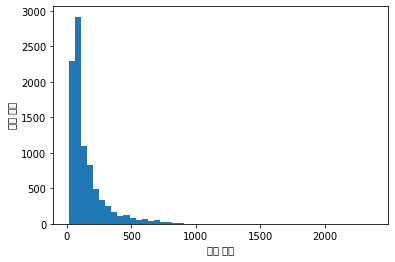

In [9]:
# 길이 분포
print("훈련 데이터의 최대 길이: {}".format(max(len(row) for row in x_train10k)))
print("훈련 데이터의 평균 길이: {}".format(sum(map(len, x_train10k))/len(x_train10k)))

plt.hist([len(s) for s in x_train10k], bins=50)
plt.xlabel("샘플 길이")
plt.ylabel("샘플 개수")
plt.show()

평균 길이에 비해 최대 길이가 깁니다.

클래스 분포를 확인해보겠습니다.

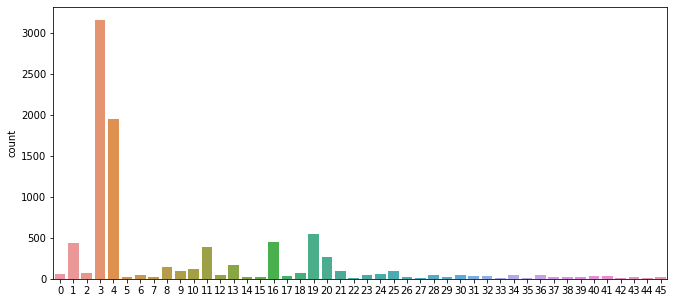

In [10]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11, 5)
sns.countplot(x=y_train10k)
plt.show()

In [11]:
unique_elements, counts_elements = np.unique(y_train10k, return_counts=True)
print("각 클래스 빈도수")
print(np.array((unique_elements, counts_elements)))

각 클래스 빈도수
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


물론 결측치가 전부 다 잘 처리된 데이터셋이지만, 일단 혹시 모르니 확인해보겠습니다.

In [12]:
train_set = pd.DataFrame(columns=['x_train', 'y_train'])
test_set = pd.DataFrame(columns=['x_test', 'y_test'])

train_set['x_train'] = x_train10k
train_set['y_train'] = y_train10k
test_set['x_test'] = x_test10k
test_set['y_test'] = y_test10k

print("Done!")

Done!


In [13]:
train_set.isnull().sum()

x_train    0
y_train    0
dtype: int64

In [14]:
test_set.isnull().sum()

x_test    0
y_test    0
dtype: int64

결측치는 없습니다.

---

# **03. 벡터화하기**

DTM 기반 전처리를 하려면 다시 디코딩을 해주어야 합니다.

In [15]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

565248/550378 [==============================] - 0s 0us/step


In [16]:
# index +3
index_to_word = {index + 3 : word for word, index in word_index.items()}
print("Done!")

Done!


In [17]:
# 0=<pad>, 1=<sos>, 2=<unk>
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

print("Done!")

Done!


In [18]:
print(' '.join([index_to_word[index] for index in x_train10k[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [19]:
# 전체 데이터 변환
decoded_10k, decoded_5k, decoded_none = [], [], []
test10k, test5k, test_none = [], [], []

## train
# 10k
for i in range(len(x_train10k)):
    t = ' '.join([index_to_word[index] for index in x_train10k[i]])
    decoded_10k.append(t)
x_train10k = decoded_10k

# 5k
for i in range(len(x_train5k)):
    t = ' '.join([index_to_word[index] for index in x_train5k[i]])
    decoded_5k.append(t)
x_train5k = decoded_5k

# none
for i in range(len(x_train_none)):
    t = ' '.join([index_to_word[index] for index in x_train_none[i]])
    decoded_none.append(t)
x_train_none = decoded_none

## test
# 10k
for i in range(len(x_test10k)):
    t = ' '.join([index_to_word[index] for index in x_test10k[i]])
    test10k.append(t)
x_test10k = test10k

# 5k
for i in range(len(x_test5k)):
    t = ' '.join([index_to_word[index] for index in x_test5k[i]])
    test5k.append(t)
x_test5k = test5k

# none
for i in range(len(x_test_none)):
    t = ' '.join([index_to_word[index] for index in x_test_none[i]])
    test_none.append(t)
x_test_none = test_none

print("Done!")

Done!


## **3-1. train data 변환**

In [20]:
## DTM 생성
# 5k
dtmvector = CountVectorizer()
x_train_dtm5k = dtmvector.fit_transform(x_train5k)
print("5k: {}".format(x_train_dtm5k.shape))

# 10k
dtmvector2 = CountVectorizer()
x_train_dtm10k = dtmvector2.fit_transform(x_train10k)
print("10k: {}".format(x_train_dtm10k.shape))

# none
dtmvector3 = CountVectorizer()
x_train_dtm_none = dtmvector3.fit_transform(x_train_none)
print("None: {}".format(x_train_dtm_none.shape))

5k: (8982, 4867)
10k: (8982, 9670)
None: (8982, 26506)


In [21]:
## TF-IDF 생성
# 5k
tfidf_transformer = TfidfTransformer()
tfidfv_5k = tfidf_transformer.fit_transform(x_train_dtm5k)
print(tfidfv_5k.shape)

# 10k
tfidf_transformer2 = TfidfTransformer()
tfidfv_10k = tfidf_transformer2.fit_transform(x_train_dtm10k)
print(tfidfv_10k.shape)

# none
tfidf_transformer3 = TfidfTransformer()
tfidfv_none = tfidf_transformer3.fit_transform(x_train_dtm_none)
print(tfidfv_none.shape)

(8982, 4867)
(8982, 9670)
(8982, 26506)


## **3-2. test data 변환**

In [22]:
## DTM / TF-IDF 생성
# 5k
x_test_dtm5k = dtmvector.transform(x_test5k)
tfidfv_5k_test = tfidf_transformer.transform(x_test_dtm5k)
print("5k: {}".format(tfidfv_5k_test.shape))

# 10k
x_test_dtm10k = dtmvector2.transform(x_test10k)
tfidfv_10k_test = tfidf_transformer2.transform(x_test_dtm10k)
print("10k: {}".format(tfidfv_10k_test.shape))

# none
x_test_dtm_none = dtmvector3.transform(x_test_none)
tfidfv_none_test = tfidf_transformer3.transform(x_test_dtm_none)
print("None: {}".format(tfidfv_none_test.shape))

5k: (2246, 4867)
10k: (2246, 9670)
None: (2246, 26506)


---

# **04. 모델 테스트**

## **4-1. 함수 선언**

In [23]:
# 모델별로 하이퍼파라미터 튜닝 없이 기본 fit 함수 활용
def default_model_testing(train_data, y_train, x_test, y_test, name):
    model = name()
    model.fit(train_data, y_train)
    predicted = model.predict(x_test)
    print(name, "accuracy: {}".format(accuracy_score(y_test, predicted)))

print("Done!")

Done!


In [36]:
# 모델별로 하이퍼파라미터 튜닝
random_state = 2022

def tuned_model_testing(train_data, y_train, x_test, y_test):

    # 01. 나이브 베이즈
    model = MultinomialNB()
    model.fit(train_data, y_train)
    predicted = model.predict(x_test)
    print("나이브 베이즈 ACC: {}".format(accuracy_score(y_test, predicted)))
    
    # 02. Complement NB
    model = ComplementNB()
    model.fit(train_data, y_train)
    predicted = model.predict(x_test)
    print("Complemnet NB ACC: {}".format(accuracy_score(y_test, predicted)))

    # 03. Logistic Regression
    model = LogisticRegression(C=10000, penalty='l2')
    model.fit(train_data, y_train)
    predicted = model.predict(x_test)
    print("Logistic Regression ACC: {}".format(accuracy_score(y_test, predicted)))

    # 04. SGD Classifier
    model = SGDClassifier()
    model.fit(train_data, y_train)
    predicted = model.predict(x_test)
    print("SGD Classifier ACC: {}".format(accuracy_score(y_test, predicted)))

    # 05. Decision Tree
    model = DecisionTreeClassifier(max_depth=10, random_state=random_state)
    model.fit(train_data, y_train)
    predicted = model.predict(x_test)
    print("Decision Tree ACC: {}".format(accuracy_score(y_test, predicted)))

    # 06. Random Forest
    model = RandomForestClassifier(n_estimators=5, random_state=random_state)
    model.fit(train_data, y_train)
    predicted = model.predict(x_test)
    print("Random Forest ACC: {}".format(accuracy_score(y_test, predicted)))
    
    # 07. GradientBoosting
    model = GradientBoostingClassifier(random_state=random_state)
    model.fit(train_data, y_train)
    predicted = model.predict(x_test)
    print("GradientBoosting ACC: {}".format(accuracy_score(y_test, predicted)))

    # 08. LinearSVC
    # LinearSVC는 L2 Reg, c=1.0가 디폴트
    model = LinearSVC()
    model.fit(train_data, y_train)
    predicted = model.predict(x_test)
    print("LinearSVC ACC: {}".format(accuracy_score(y_test, predicted)))

print("Done!")

Done!


## **4-2 훈련 & 평가**

### **4-2-1. 디폴트 함수를 사용할 경우**

In [25]:
# 10k
model_list = [MultinomialNB, ComplementNB,
              LogisticRegression, SGDClassifier,
              DecisionTreeClassifier, RandomForestClassifier,
              GradientBoostingClassifier, LinearSVC]

for names in model_list:
    default_model_testing(tfidfv_10k, y_train10k, tfidfv_10k_test, y_test10k, names)

<class 'sklearn.naive_bayes.MultinomialNB'> accuracy: 0.6567230632235085
<class 'sklearn.naive_bayes.ComplementNB'> accuracy: 0.7707034728406055


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


<class 'sklearn.linear_model._logistic.LogisticRegression'> accuracy: 0.7951914514692787
<class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'> accuracy: 0.8450578806767587
<class 'sklearn.tree._classes.DecisionTreeClassifier'> accuracy: 0.6932324131789849
<class 'sklearn.ensemble._forest.RandomForestClassifier'> accuracy: 0.7537845057880677
<class 'sklearn.ensemble._gb.GradientBoostingClassifier'> accuracy: 0.7662511130899377
<class 'sklearn.svm._classes.LinearSVC'> accuracy: 0.8299198575244879


In [26]:
# 5k
for names in model_list:
    default_model_testing(tfidfv_5k, y_train5k, tfidfv_5k_test, y_test5k, names)

<class 'sklearn.naive_bayes.MultinomialNB'> accuracy: 0.6731967943009796
<class 'sklearn.naive_bayes.ComplementNB'> accuracy: 0.7707034728406055


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


<class 'sklearn.linear_model._logistic.LogisticRegression'> accuracy: 0.7978628673196795
<class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'> accuracy: 0.8423864648263579
<class 'sklearn.tree._classes.DecisionTreeClassifier'> accuracy: 0.6959038290293855
<class 'sklearn.ensemble._forest.RandomForestClassifier'> accuracy: 0.7658058771148709
<class 'sklearn.ensemble._gb.GradientBoostingClassifier'> accuracy: 0.7707034728406055
<class 'sklearn.svm._classes.LinearSVC'> accuracy: 0.8290293855743545


In [27]:
# None
for names in model_list:
    default_model_testing(tfidfv_none, y_train_none, tfidfv_none_test, y_test_none, names)

<class 'sklearn.naive_bayes.MultinomialNB'> accuracy: 0.5997328584149599
<class 'sklearn.naive_bayes.ComplementNB'> accuracy: 0.7649154051647373


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


<class 'sklearn.linear_model._logistic.LogisticRegression'> accuracy: 0.7920747996438112
<class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'> accuracy: 0.8459483526268923
<class 'sklearn.tree._classes.DecisionTreeClassifier'> accuracy: 0.6994657168299199
<class 'sklearn.ensemble._forest.RandomForestClassifier'> accuracy: 0.744879786286732
<class 'sklearn.ensemble._gb.GradientBoostingClassifier'> accuracy: 0.7724844167408726
<class 'sklearn.svm._classes.LinearSVC'> accuracy: 0.8294746215494212


결과값을 표로 나타내면 다음과 같습니다.

num_words | Multinomial NB | Complement NB | Logistic Regression | Stochastic Gradient Descent | Decision Tree | Random Forest | Gradient Boosting | Linear SVC
:--|--:|--:|--:|--:|--:|--:|--:|--:
**5k** | 67.32 | 77.07 | 79.79 | 84.24 | 69.59 | 76.58 | 77.07 | 82.90
**10k** | 65.67 | 77.07 | 79.52 | 84.51 | 69.32 | 75.38 | 76.63 | 82.99
**None** | 59.97 | 76.49 | 79.21 | 84.60 | 69.95 | 74.49 | 77.25 | 82.95


모델에 따라 num_words의 크기에 따른 결과가 다릅니다. 일부는 num_words가 작을 수록 성능이 향상되고, 다른 것들은 그 반대입니다.

일관적으로 성능이 줄어드는 특정 모델들의 경우 베이지안 기반이라는 공통점이 있습니다. 베이지안 기반 모델의 특징은 각각의 피처를 동등하게 보는 경험적 확률을 사용하기 때문에 참고하는 데이터의 개수에 큰 영향을 받는다는 것입니다. 즉, 참고할 피처 수가 늘어날 수록 모델의 추론력이 하락한다는 단점이 있습니다.

이 경우, num_words가 참고하는 데이터의 개수에 해당합니다.

실제로 Multinomial/Complement NB 모델의 경우 일관적으로 성능이 줄어듭니다. 반면에 Gradient Boosting과 Linear SVC의 경우에는 성능의 변화가 일관적이지 않습니다. 이 경우에는 결과의 신뢰도가 다소 저하되므로, 데이터 크기에 따른 일관적인 성능 변화를 보여준 모델들(MNB, CNB, LR, RF)을 기준으로 적합한 num_words를 선정하겠습니다.

따라서 **적합한 num_words = 5k**입니다.

### **4-2-2. 하이퍼 파라미터 튜닝했을 경우**

In [38]:
# 5k
tuned_model_testing(tfidfv_5k, y_train5k, tfidfv_5k_test, y_test5k)

나이브 베이즈 ACC: 0.6731967943009796
Complemnet NB ACC: 0.7707034728406055


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Logistic Regression ACC: 0.8058771148708815
SGD Classifier ACC: 0.8410507569011576
Decision Tree ACC: 0.6179875333926982
Random Forest ACC: 0.7008014247551202
GradientBoosting ACC: 0.7671415850400712
LinearSVC ACC: 0.8290293855743545


### **4-3.3 Soft Voting**

status | Multinomial NB | Complement NB | Logistic Regression | Stochastic Gradient Descent | Decision Tree | Random Forest | Gradient Boosting | Linear SVC
:--|--:|--:|--:|--:|--:|--:|--:|--:
**Before** (not tuned) | 67.32 | 77.07 | 79.79 | **84.24** | **69.59** | **76.58** | **77.07** | 82.90
**After** (tuned) | 67.32 | 77.07 | **80.59** | 84.11 | 61.80 | 70.08 | 76.71 | 82.90
**Is Tuned?** | N | N | Y | N | Y | Y | Y | N



결과는 위와 같습니다.

성능의 우열은 크게 바뀌지 않습니다만 SGD의 경우 별도의 하이퍼 파라미터 지정을 하지 않았음에도 모델의 특성상 (확률 이슈로 인해) 성능이 조금 차이나는 것을 확인할 수 있습니다.

하이퍼 파라미터 튜닝을 해준 모델들(DT, RF, GB, LR) 중 로지스틱 회귀를 제외한 나머지는 오히려 성능이 저하되었습니다. 노드에서 제공하는 하이퍼 파라미터 옵션이 최적화된 옵션이 아니라는 의미일 수 있겠네요. (사실 Logistic Regression에서 iteration 경고가 나타나는 것을 보면 최적화된 옵션이 아니라는 점을 미리 알 수 있긴 합니다.)

이제 Top3 모델 (SGD, Linear SVC, Logistic Regression)을 골라 보팅을 하겠습니다. 데이터가 불균형하므로 f1 score를 사용할 수도 있겠지만, 뉴스 카테고리 분류 문제는 어찌됐든 정답을 맞추기만 하면 되므로 여기서는 accuracy를 기준으로 평가합니다.

In [61]:
# hard voting
def voting_test(train_data, y_train, x_test, y_test):
    voting_classifier = VotingClassifier(estimators=[('SGD', SGDClassifier(random_state=random_state)),
                                                     ('LSVC', LinearSVC(random_state=random_state)),
                                                     ('LR', LogisticRegression(random_state=random_state, C=10000, penalty='l2'))],
                                         
                                         # SGDClassifier의 디폴트 loss함수가 hinge이기 때문에 바로 soft voting이 되지 않습니다.
                                         # 또한 LinearSVC는 클래스 확률값을 제공하지 않으므로 probability=True 옵션을 주어야 합니다.
                                         # 여기서는 간단하게 hard voting을 사용합니다.

                                         voting='hard', n_jobs=-1)

    voting_classifier.fit(train_data, y_train)
    predicted = voting_classifier.predict(x_test)
    print("Voting ACC: {}".format(accuracy_score(y_test, predicted)))

print("Done!")

Done!


In [62]:
voting_test(tfidfv_5k, y_train5k, tfidfv_5k_test, y_test5k)

Voting ACC: 0.8290293855743545


머신러닝 모델의 최종 ACC 결과값은 0.8290 입니다.

# **05. 딥러닝 모델과 비교**

## **5-1. Simple RNN**

TF-IDF 모델은 기본적으로 문서가 포함하는 단어들의 빈도를 기반으로 삼습니다.

하지만 그 순서는 알기 어렵기 때문에 데이터를 순서대로 넣어줘야 할 필요가 있습니다.

따라서 시퀀스 처리에 적합한 딥러닝 모델을 사용합니다.

In [100]:
# simple RNN

vocab_size = 20000
word_vector_dim = 128  

model_LSTM = keras.Sequential()
model_LSTM.add(keras.layers.Embedding(vocab_size, word_vector_dim))
model_LSTM.add(keras.layers.LSTM(64))
model_LSTM.add(keras.layers.Dense(num_classes, activation='softmax'))  

model_LSTM.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 128)         2560000   
                                                                 
 lstm_6 (LSTM)               (None, 64)                49408     
                                                                 
 dense_10 (Dense)            (None, 46)                2990      
                                                                 
Total params: 2,612,398
Trainable params: 2,612,398
Non-trainable params: 0
_________________________________________________________________


In [101]:
# 5k
tfidfv_5k.shape, y_train5k.shape

((8982, 4867), (8982,))

In [102]:
# seq data 형태로 변환
tfidfv_5k_densed = tfidfv_5k.toarray()
print("Done!")

Done!


In [103]:
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)

model_LSTM.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])
            
epochs=20
batch_size=64

print("Done!")

Done!


In [104]:
# train
history_LSTM = model_LSTM.fit(tfidfv_5k_densed,
                              y_train5k,
                              epochs=epochs,
                              validation_split=0.2,
                              batch_size=batch_size,
                              callbacks=es,
                              verbose=1)

Epoch 1/20
113/113 [==============================] - 27s 227ms/step - loss: 2.6243 - accuracy: 0.3166 - val_loss: 2.4064 - val_accuracy: 0.3450
Epoch 2/20
113/113 [==============================] - 24s 213ms/step - loss: 2.4104 - accuracy: 0.3534 - val_loss: 2.4117 - val_accuracy: 0.3450
Epoch 3/20
113/113 [==============================] - 25s 218ms/step - loss: 2.4106 - accuracy: 0.3534 - val_loss: 2.4119 - val_accuracy: 0.3450
Epoch 4/20
113/113 [==============================] - 24s 215ms/step - loss: 2.4094 - accuracy: 0.3534 - val_loss: 2.4088 - val_accuracy: 0.3450
Epoch 5/20
113/113 [==============================] - 26s 227ms/step - loss: 2.4111 - accuracy: 0.3534 - val_loss: 2.4075 - val_accuracy: 0.3450
Epoch 5: early stopping


성능이 영 시원찮아 보입니다.

아무래도 input으로 사용하는 데이터 수가 적어서 충분히 학습하지 못하는 것 같습니다.

일단 한번 테스트해보겠습니다.

In [105]:
tfidfv_5k_test_densed = tfidfv_5k_test.toarray()
rnn_result = model_LSTM.evaluate(tfidfv_5k_test_densed, y_test5k, verbose=2)

71/71 - 6s - loss: 2.4180 - accuracy: 0.3620 - 6s/epoch - 78ms/step


모델의 정확도는 약 36.2%입니다.

---

## **5-2. 모델 개선**

layer 수를 늘리고 drop out을 걸어서 조금 더 개선해 보겠습니다.

In [109]:
# more layers
# use drop out

model_LSTM2 = keras.Sequential()
model_LSTM2.add(keras.layers.Dense(128, activation='relu', input_shape=(tfidfv_5k_densed.shape[1],)))
model_LSTM2.add(keras.layers.Dropout(0.2))  
model_LSTM2.add(keras.layers.Dense(128, activation='relu'))
model_LSTM2.add(keras.layers.Dense(256, activation='relu')) 
model_LSTM2.add(keras.layers.Dense(512, activation='relu'))  
model_LSTM2.add(keras.layers.Dense(num_classes, activation='softmax'))

model_LSTM2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               623104    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               16512     
                                                                 
 dense_17 (Dense)            (None, 256)               33024     
                                                                 
 dense_18 (Dense)            (None, 512)               131584    
                                                                 
 dense_19 (Dense)            (None, 46)                23598     
                                                                 
Total params: 827,822
Trainable params: 827,822
Non-tr

In [110]:
model_LSTM2.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

In [111]:
history_LSTM2 = model_LSTM2.fit(tfidfv_5k_densed,
                               y_train5k,
                               epochs=epochs,
                               validation_split=0.2,
                               batch_size=batch_size,
                               callbacks=es,
                               verbose=1)

Epoch 1/20
113/113 [==============================] - 1s 5ms/step - loss: 1.9574 - accuracy: 0.5079 - val_loss: 1.3869 - val_accuracy: 0.6784
Epoch 2/20
113/113 [==============================] - 0s 4ms/step - loss: 1.1091 - accuracy: 0.7240 - val_loss: 1.0623 - val_accuracy: 0.7551
Epoch 3/20
113/113 [==============================] - 0s 4ms/step - loss: 0.7200 - accuracy: 0.8189 - val_loss: 0.9911 - val_accuracy: 0.7780
Epoch 4/20
113/113 [==============================] - 0s 4ms/step - loss: 0.4932 - accuracy: 0.8697 - val_loss: 1.0365 - val_accuracy: 0.7707
Epoch 5/20
113/113 [==============================] - 0s 4ms/step - loss: 0.3504 - accuracy: 0.9038 - val_loss: 1.1099 - val_accuracy: 0.7741
Epoch 6/20
113/113 [==============================] - 0s 4ms/step - loss: 0.2717 - accuracy: 0.9272 - val_loss: 1.1311 - val_accuracy: 0.7902
Epoch 7/20
113/113 [==============================] - 0s 4ms/step - loss: 0.2133 - accuracy: 0.9393 - val_loss: 1.1592 - val_accuracy: 0.7813
Epoch 

In [112]:
# test
rnn_result2 = model_LSTM2.evaluate(tfidfv_5k_test_densed, y_test5k, verbose=2)

71/71 - 0s - loss: 1.2215 - accuracy: 0.7760 - 162ms/epoch - 2ms/step


정확도가 기존보다 2배 넘게 상승했습니다.

한번 F1 score도 살펴보겠습니다.

In [115]:
print(classification_report(y_test5k, model_LSTM2.predict(tfidfv_5k_test_densed).argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.38      0.67      0.48        12
           1       0.73      0.70      0.72       105
           2       0.43      0.65      0.52        20
           3       0.93      0.92      0.93       813
           4       0.83      0.88      0.85       474
           5       0.09      0.20      0.13         5
           6       0.69      0.79      0.73        14
           7       1.00      0.33      0.50         3
           8       0.49      0.66      0.56        38
           9       0.66      0.76      0.70        25
          10       0.92      0.73      0.81        30
          11       0.62      0.70      0.66        83
          12       0.33      0.15      0.21        13
          13       0.62      0.65      0.63        37
          14       0.25      0.50      0.33         2
          15       0.33      0.11      0.17         9
          16       0.68      0.74      0.71        99
          17       0.41    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


딥러닝 모델의 최종 정확도는 **77.6%** 입니다.

# **06. 회고**

- 머신러닝 모델은 딥러닝 모델에 비해 상대적으로 robust하다는 것을 볼 수 있었습니다. 실제로 딥러닝 모델의 초기 훈련 결과 약 36%의 정확도를 보였지만, 머신러닝 모델의 경우 별다른 튜닝 없는 디폴트 상태로 사용했을 때에도 최소 59%의 성능을 보여주었습니다.

- 대신 딥러닝 모델은 설계에 따라 정확도가 급상승한다는 장점이 있습니다. 또한 머신러닝 모델보다 훨씬 세밀하게 모델을 조절할 수 있습니다. 머신러닝 모델의 경우 하이퍼파라미터 튜닝에 따른 성능 변화가 드라마틱할 정도로 크지는 않습니다. 따라서 정확도가 매우 중요한 분야(의료, 금융, 반도체 공정 등)에서는 머신러닝 모델보다 잘 설계된 딥러닝 모델을 사용하는 것이 더 좋다고 판단할 수 있습니다.